In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Functions ##

In [33]:
def say_hello(name):
    return 'hello ' + name
say_hello('EJ')

'hello EJ'

In [9]:
triple(9)

27

In [ ]:
num = 4

In [ ]:
triple(num)

### Note About Scopes

In [ ]:
x

In [ ]:
x = 5

In [ ]:
triple(2 * x)

In [ ]:
x

### Type Agnostic

In [ ]:
triple('ha')

In [ ]:
triple(np.arange(4))

### What this function do?

In [ ]:
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

In [ ]:
percent_of_total(make_array(1,1,1,1))

In [ ]:
percent_of_total(make_array(1, 213, 38))

### Multiple Arguments

$ h^2 = x^2 + y^2 \hspace{20 pt} => \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $

In [ ]:
def hypotenuse(x,y):
    hypot_squared = (x ** 2 + y ** 2)
    return hypot_squared ** 0.5

In [ ]:
hypotenuse(9, 12)

In [ ]:
hypotenuse(2, 2)

In [ ]:
hypotenuse(1)

In [ ]:
#write a function called hello2 will do the following
#hello2('A','B')
#output: 'Hello A and B'

## Apply using function

In [23]:
student = Table().with_columns(
    'Name', make_array('Jim', 'Dwight', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
student

Name,Birth Year
Jim,1985
Dwight,1988
Michael,1967
Creed,1904


In [27]:
def greeting(person):
    return 'Bonjour ' + person

In [28]:
greeting('Pam')

'Bonjour Pam'

In [29]:
greeting('Erin')

'Bonjour Erin'

In [34]:
student.apply(say_hello, 'Name')

array(['hello Jim', 'hello Dwight', 'hello Michael', 'hello Creed'],
      dtype='<U13')

In [40]:
def name_and_age(name, year):
    age = 2022 - year -1
    return name + ' is ' + str(age) + ' years old'

In [41]:
name_and_age('CJ',1997)

'CJ is 24 years old'

In [43]:
student2 = student.apply(name_and_age, 'Name','Birth Year')
student2
#Table().with_column('name_and_age', )

array(['Jim is 36 years old', 'Dwight is 33 years old',
       'Michael is 54 years old', 'Creed is 117 years old'], dtype='<U23')

In [ ]:
name_and_age('Thomas',2006)

## Grouping by One Column: Ice cream Cones

In [44]:
cones = Table.read_table('../data/cones.csv')

In [45]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [ ]:
pivot_cones = cones.pivot('Color','Flavor', 'Price', np.max)
pivot_cones

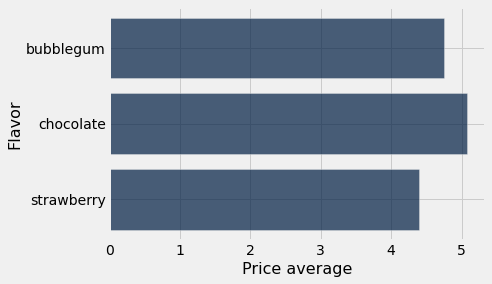

In [57]:
cones.drop('Color').group('Flavor', np.average).barh('Flavor')

In [50]:
cones.group(['Color','Flavor']).num_rows

/Users/karenchen/opt/anaconda3/lib/python3.8/site-packages/datascience/tables.py:999: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


4

In [ ]:
(3.55+5.25)/2


In [ ]:
cones.drop('Color').group('Flavor', np.average)

In [ ]:
# Question: what if you don't drop color, what will happen?
cones.group('Flavor', np.average)

In [ ]:
cones.drop('Color').group('Flavor', min)

## Grouping By One Column: Welcome Survey ##

In [ ]:
survey = Table.read_table('../data/welcome_survey_v2.csv')
survey
# what kind of table is it? a transaction table or aggregated/summary table, what is the unit of analysis?

In [ ]:
survey.group('Year', np.average)

In [ ]:
by_extra = survey.group('Extraversion', np.average)
by_extra

In [ ]:
by_extra.select(0,2,3).plot('Extraversion') # Drop the 'Years average' column

In [ ]:
by_extra.select(0,3).plot('Extraversion')

## Grouping by Two Columns ##

In [ ]:
survey = Table.read_table('../../data/welcome_survey_v3.csv')
survey

In [ ]:
survey.group(['Handedness','Sleep position'])

In [ ]:
#sum(g.column(2))
survey.num_rows

## Pivot Tables

In [ ]:
survey.pivot('Handedness', 'Sleep position')

In [ ]:
survey.pivot( 'Handedness', 'Sleep position', 'Hours of sleep', collect=np.average)

In [ ]:
survey.group('Handedness', np.average)

In [ ]:
sky = Table.read_table('../../data/skyscrapers.csv')
sky

In [ ]:
#For each city, what’s the tallest building for each material?
#For each city, what’s the age difference between the oldest  steel building and the oldest concrete building?